In [1]:
# Run `jupyter notebook` in the braidpool/tests directory, or add the path to the tests/ directory here
#sys.path.append('../braidpool/tests/') 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]
import braid
from simulator import *

In [2]:
# A larger network or lower difficulty makes thicker braids
# Re-run this block to generate a different braid.
# The target and hashrate parameters are measured on my CPU (Intel 3.3 GHz) Run `simulator.py --mine` to benchmark your CPU
n = Network(nnodes=50, target=2**240-1, hashrate=800000)
# Use `mine=False` to use the geometric distribution to simulate mining. Use `mine=True` to actually compute sha256d hashes (slower)
n.simulate(nbeads=30, mine=False) 

# Each node has its own braid, look at node 0's braid here.
b = n.nodes[0].braid
# Extract the `parents` dict as integers (hashes) instead of instances of the <Bead> object
hashed_parents = {int(k): set(map(int, v)) for k,v in dict(b).items()}
# Remap integers (hashes) in the parents array to sequential integers for display purposes
parents = braid.number_beads(hashed_parents)
children = braid.reverse(parents)
work = braid.descendant_work(parents)
hwpath = braid.highest_work_path(parents, children)
cohorts = list(braid.cohorts(parents))
print(f"Generated braid: {len(b.beads)} beads with {len(cohorts)} cohorts, {len(b.tips)} tips, "
      f"and {len(hwpath)} beads in the highest work path.")

Generated braid: 30 beads with 11 cohorts, 3 tips, and 15 beads in the highest work path.


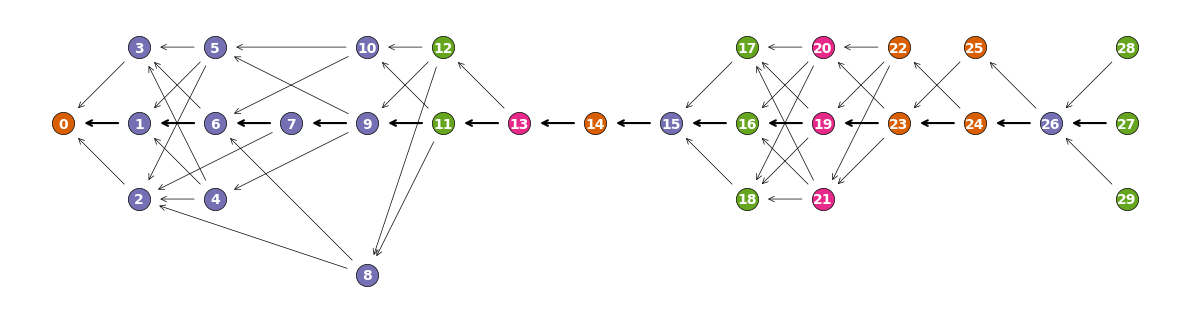

In [3]:
# The `layout()` function could use some work. It leaves some extra space and sometimes draws arrows over beads.
# If you want to work on it, I'd love to have beads place both above and below the highest work path, in order 
# of decreasing work as you move away from the highest work path vertically.
b.plot()

2width.json


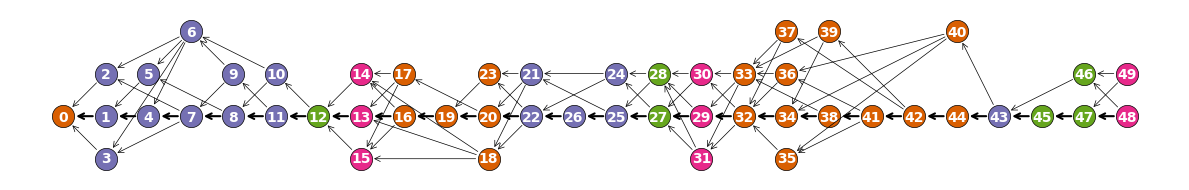

3cohort_tipcohort.json


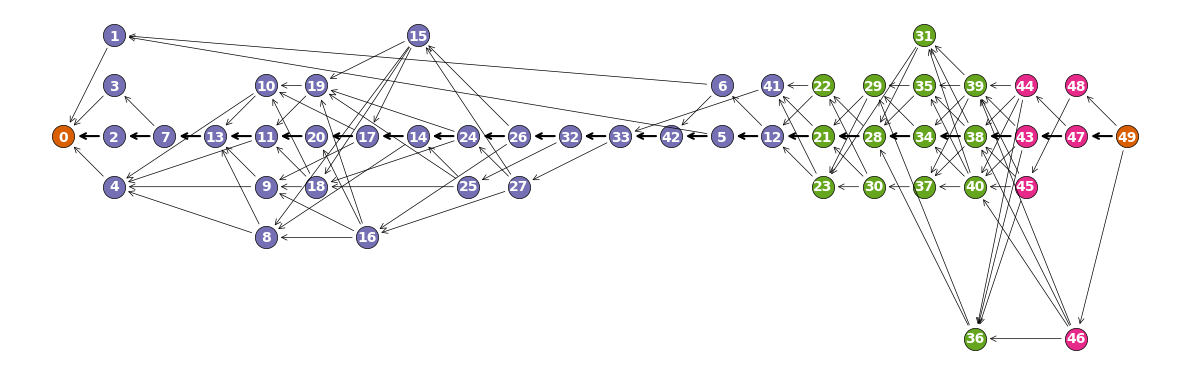

3w1missing.json


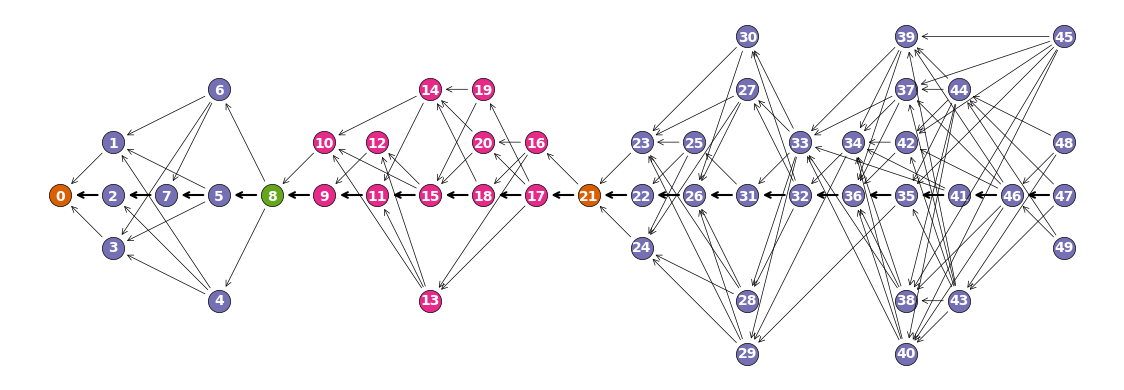

blob1.json


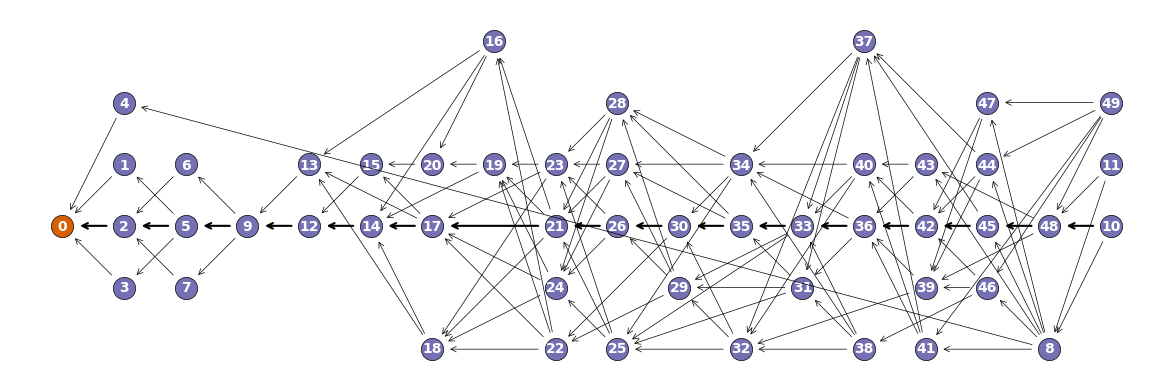

blob2.json


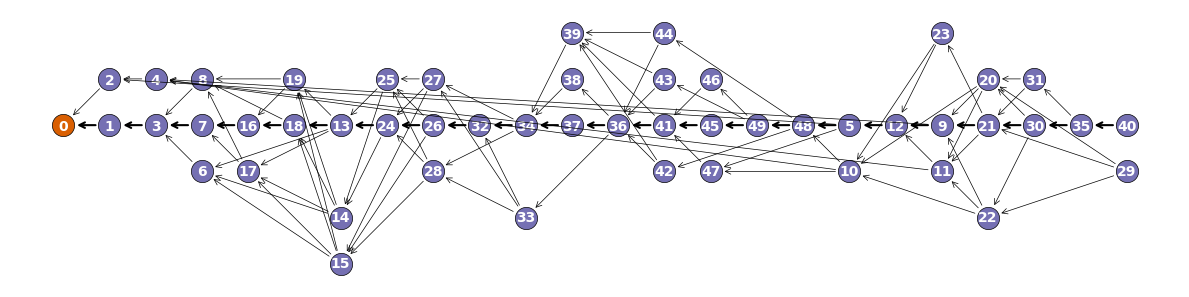

blob3.json


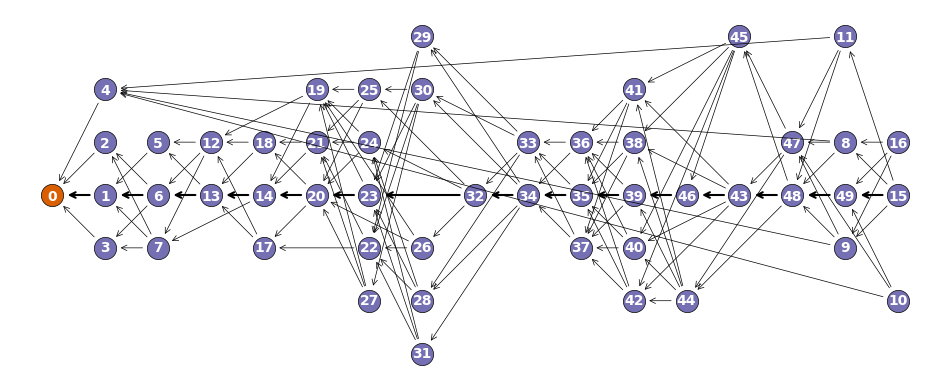

blob4.json


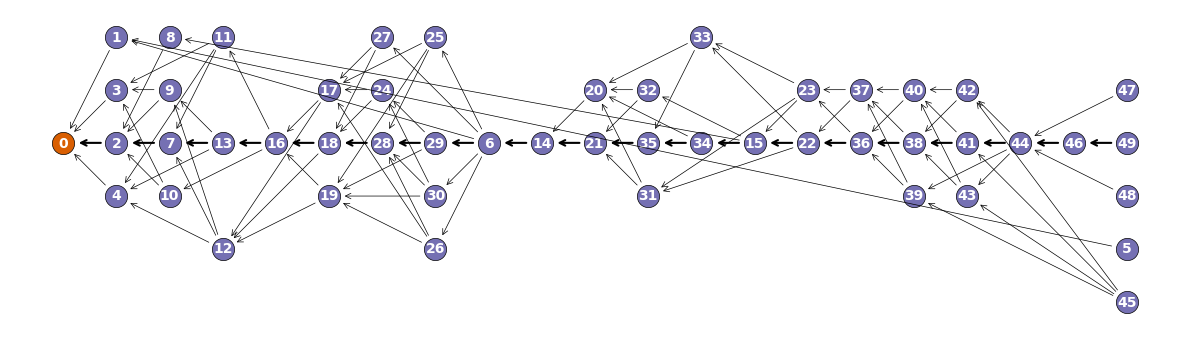

blob5.json


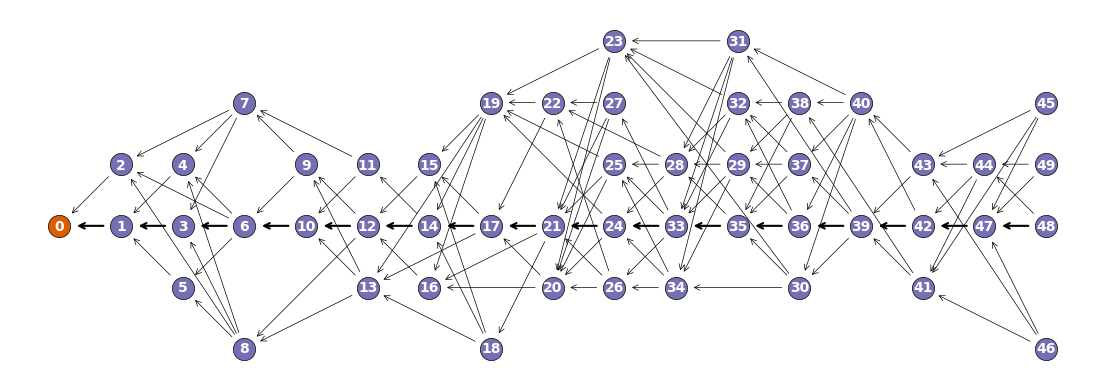

blob6.json


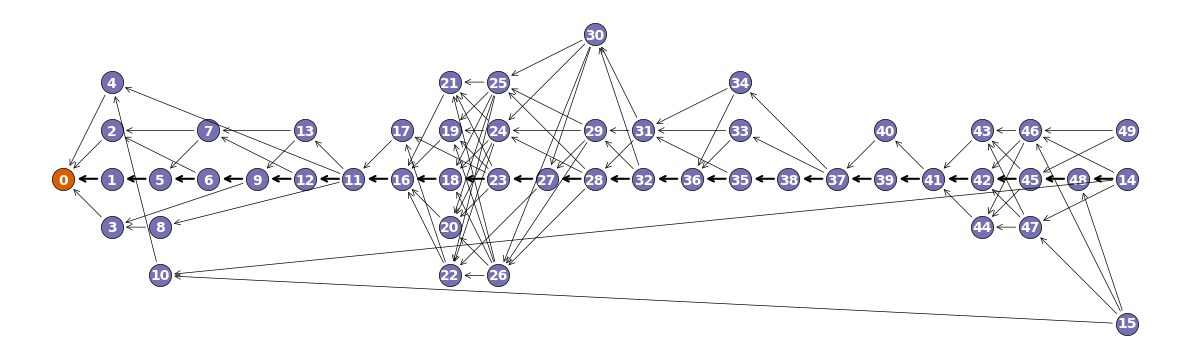

blob7.json


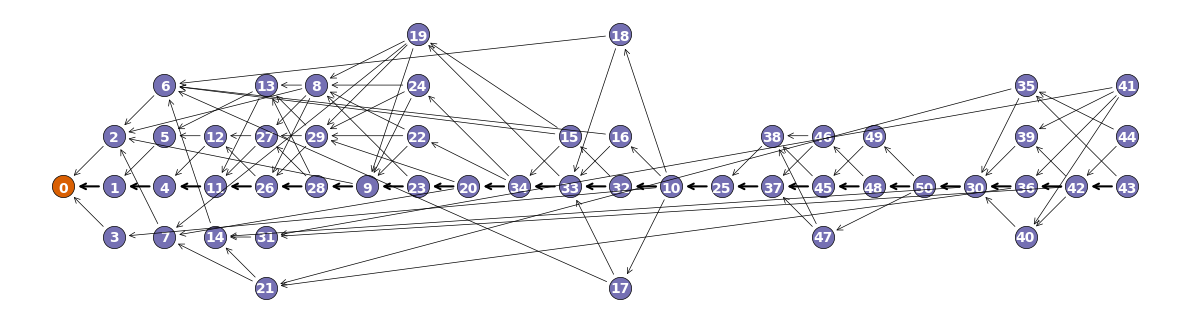

blob_1cohort.json


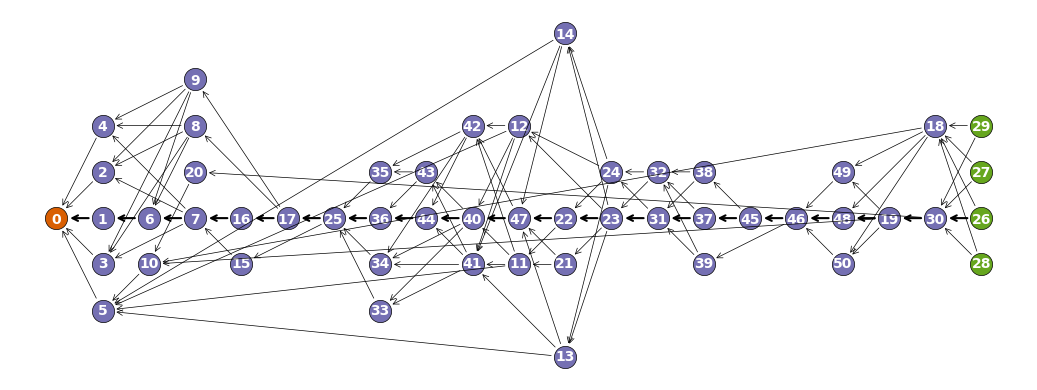

blob_1cohort2.json


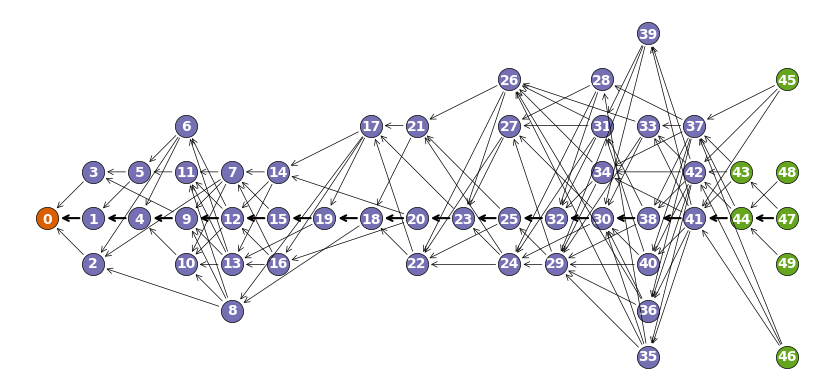

blob_closed_1bead.json


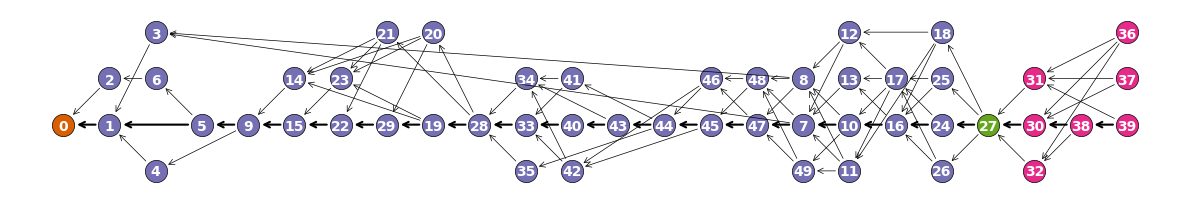

blob_closed_1bead_tip.json


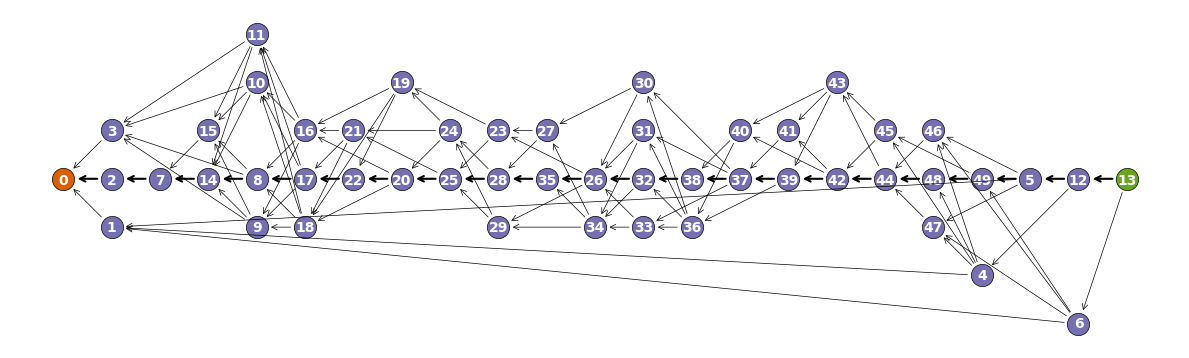

blockchain.json


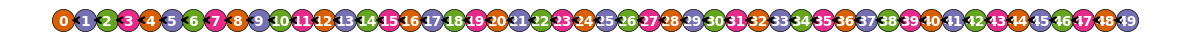

braid.json


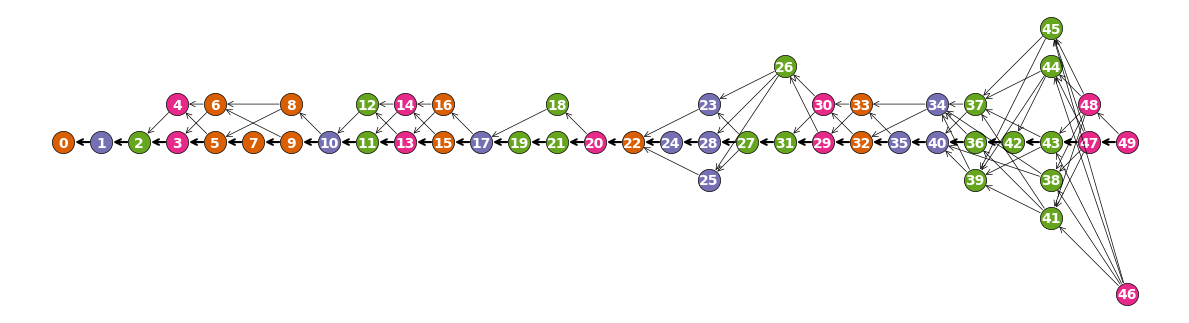

dangling_tip.json


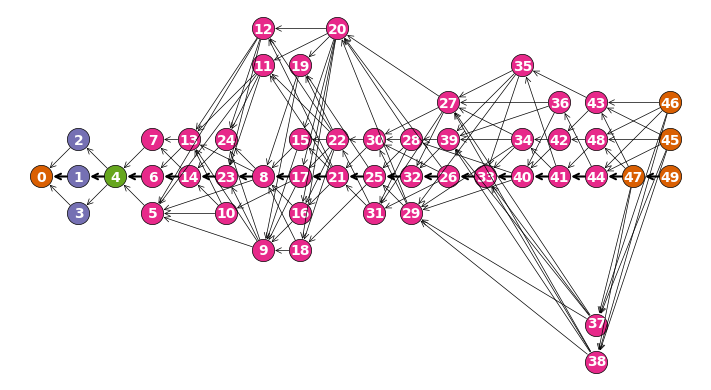

ladder.json


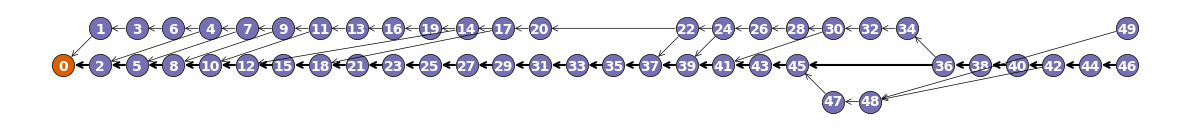

manytips.json


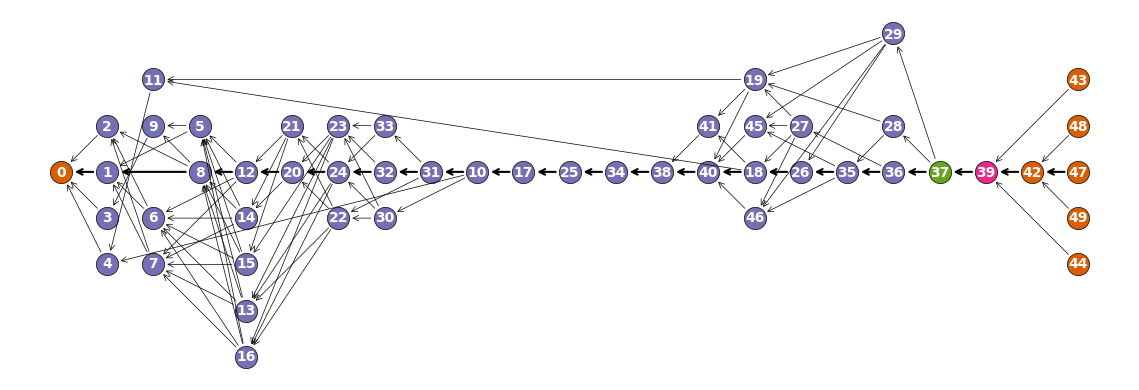

one_more_bead.json


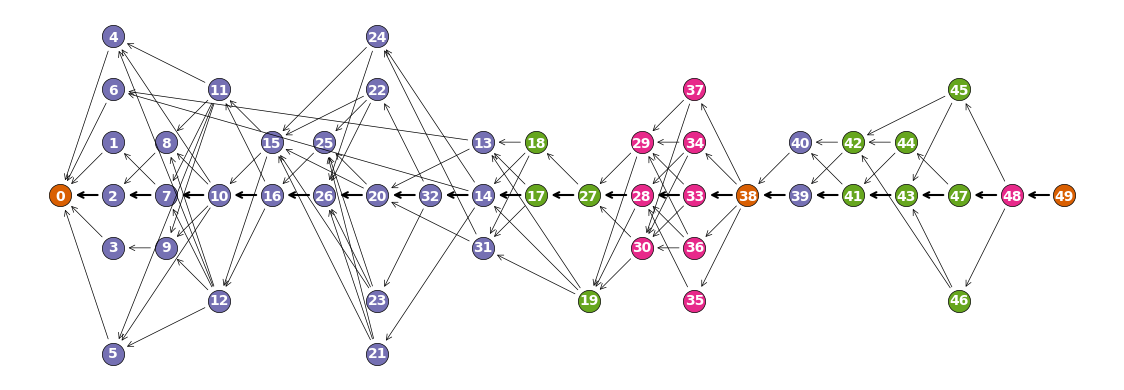

pairtip.json


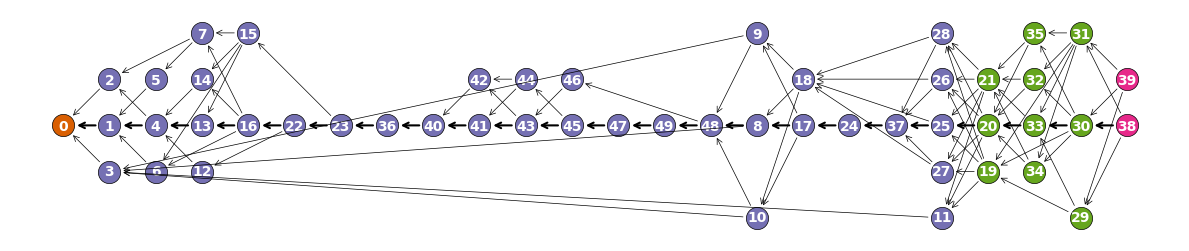

random1.json


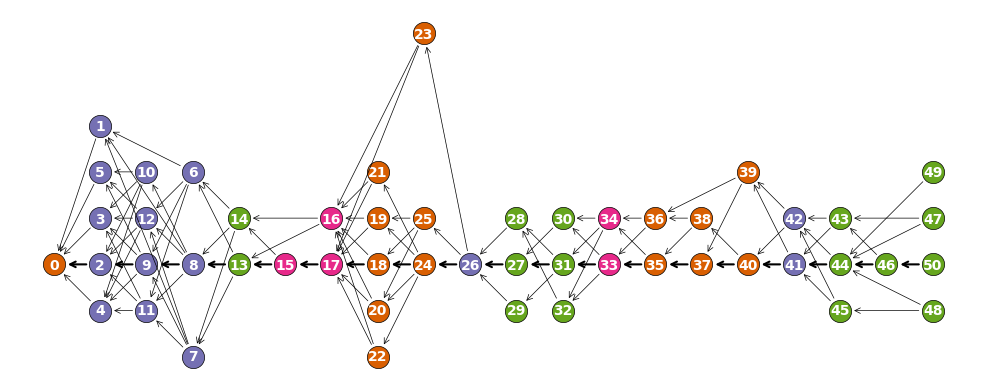

random10.json


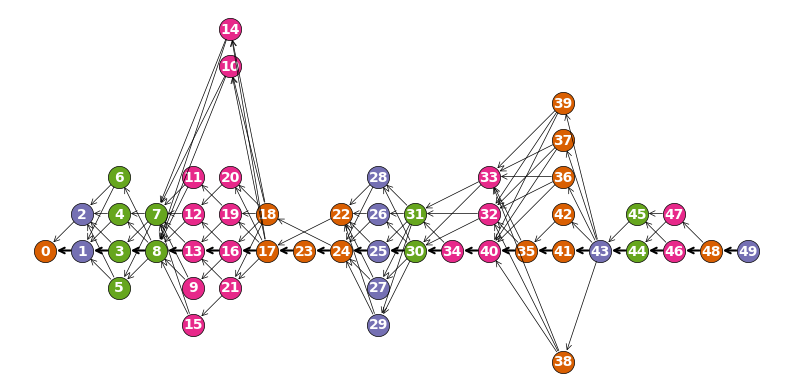

random2.json


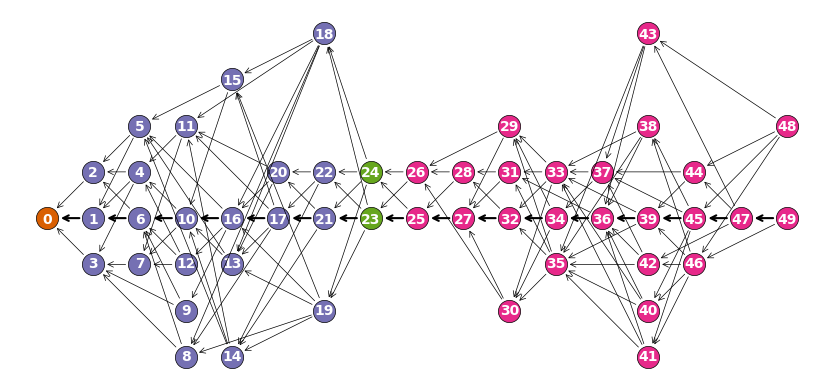

random3.json


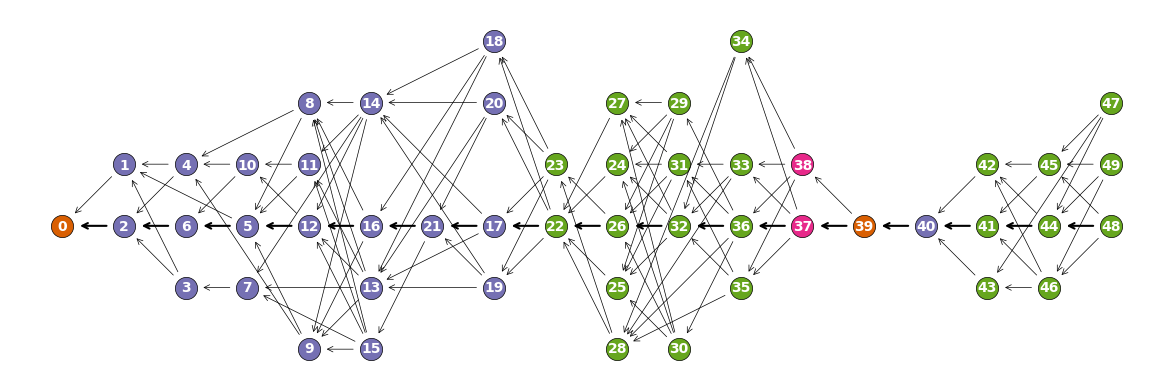

random4.json


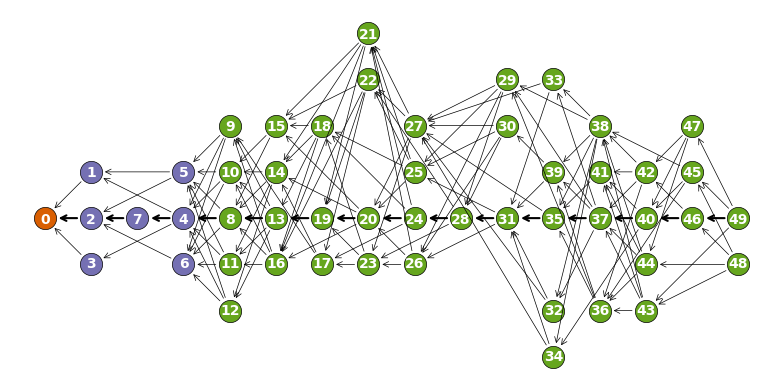

random5.json


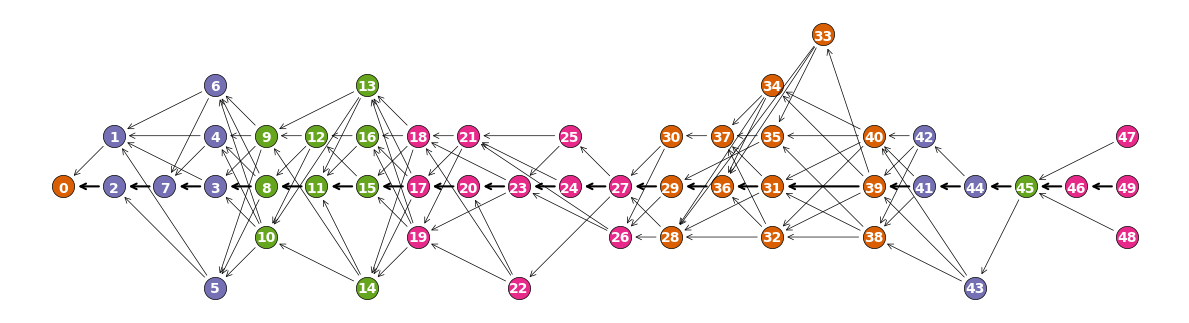

random6.json


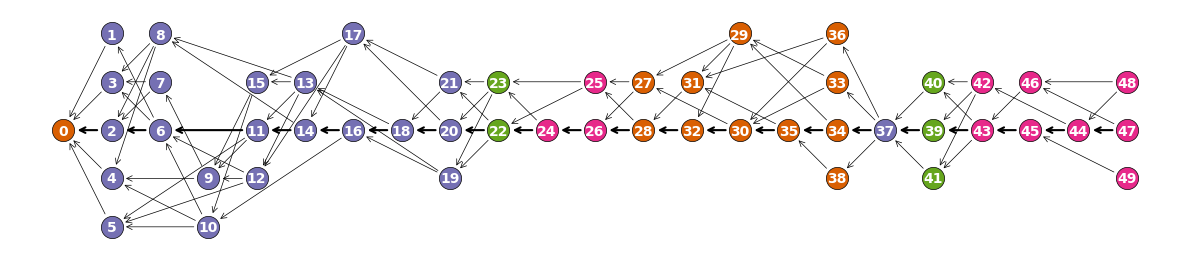

random7.json


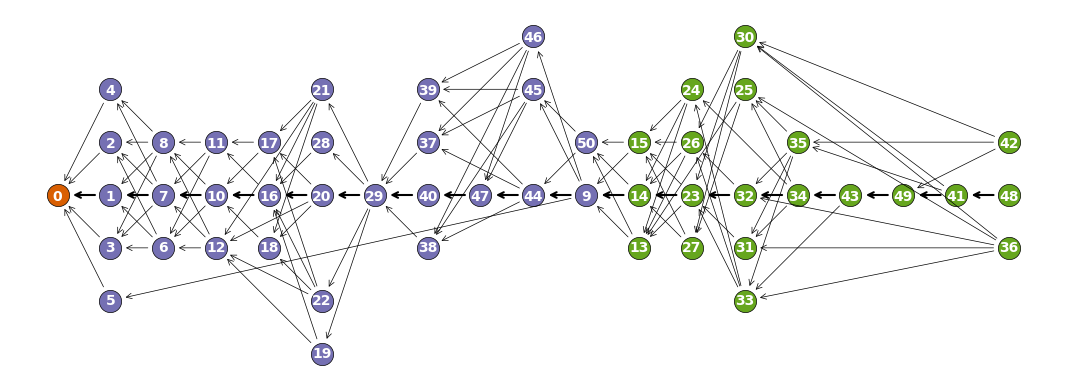

random8.json


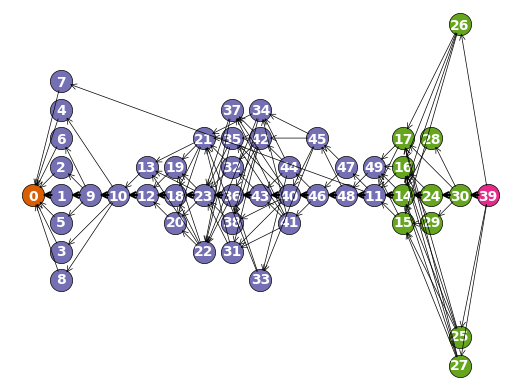

random9.json


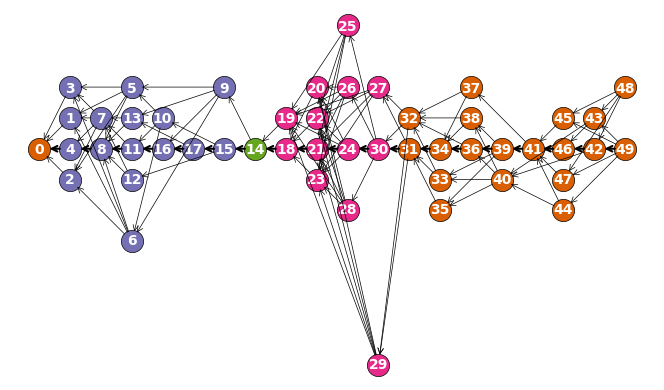

tail_intersect_head.json


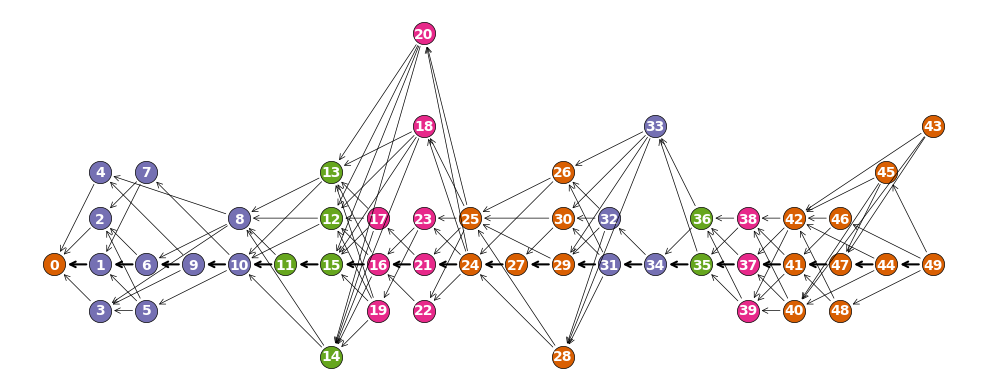

test.json


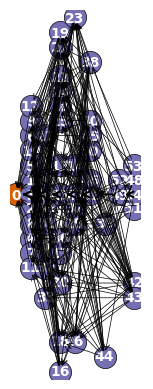

triangle_pentagon.json


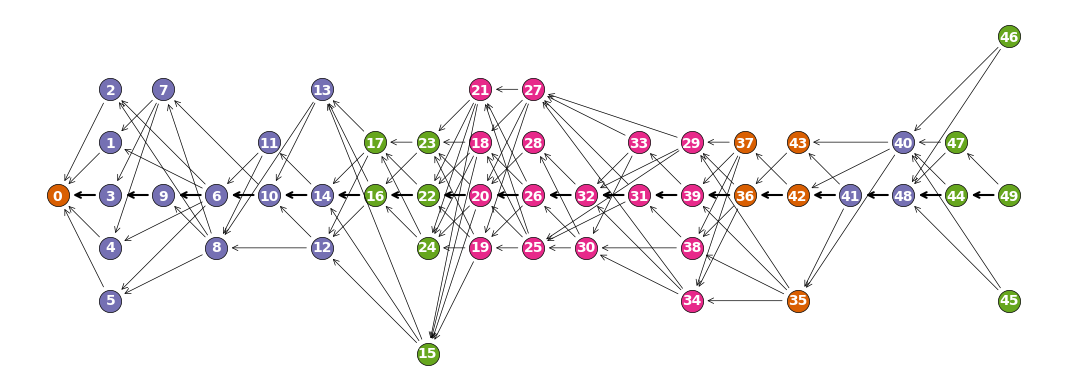

In [4]:
# Graph all test case braids. These are NASTY
import os
TEST_CASE_DIR = "braids/"
for filename in sorted([filename for filename in os.listdir(TEST_CASE_DIR) if filename.endswith(".json")]):
    print(filename)
    b = Braid(filename=TEST_CASE_DIR+filename)
    b.plot()
